### Data Structure 
- list of experiments: link of compression experiments and CT scans

- how to plot the compression data 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [17]:
#for stress-strain conversion
sample_surface = np.pi*(33.6e-3/2.)**2 #m^2
sample_height = 14 # mm

read "Data_structure.csv" file as pandas data frame. It lists the conducted compression experiments (snow type and sintering time) with the compression file (force-displacement data) and the ct grey image (if it exists). 

In [24]:
data = pd.read_csv("Data/Data_structure.csv",delimiter=";")
data.keys()

Index([u'sintering time', u'sintering time (d)', u'sample class',
       u'compression file', u'ct scan', u'ct grey image'],
      dtype='object')

#### example plot

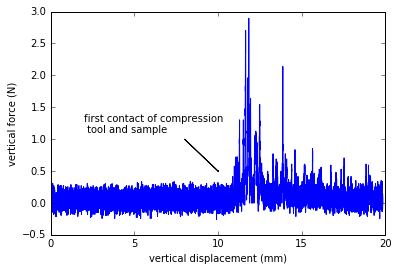

In [31]:
upper_bound = 20000 # number of data points during compression (for higher numbers, the compression tool drives up again)

exp_data = pd.read_csv("Data/Compression_Experiments/ice_beads_poured/5d/2018-05-14_15-42-57_5d_no11_H7.txt",delimiter="\t",header = 35)

displacement = exp_data["dx"][:upper_bound]  # mm
force = exp_data["Fz"][:upper_bound]  # N

plt.plot(displacement,force)

plt.xlabel("vertical displacement (mm)");plt.ylabel("vertical force (N)")
plt.arrow(8,1,2,-0.5)
plt.text(2,1.1,"first contact of compression\n tool and sample" )

#### List of experiments, which sample class investigated at which sintering time

In [26]:
def list_of_experiments():
    print  data["sample class"][0], "--", data["sintering time"][0]
    for i in range(1,len(data)-1): 
        if data["sintering time"][i]!=data["sintering time"][i-1]:
            print  data["sample class"][i], "--", data["sintering time"][i]
list_of_experiments()

ice_beads_poured -- 1d
ice_beads_poured -- 3d
ice_beads_poured -- 5d
ice_beads_poured -- 10d
ice_beads_tapped -- 5d
ice_beads_tapped -- 10d
RG_snow -- 5min
RG_snow -- 2h
RG_snow -- 4h
RG_snow -- 8h
RG_snow -- 1d
RG_snow -- 2d
RG_snow -- 5d


to list all experiments of one sample class per sintering time, choose one of the "list_of_experiments" combinations (e.g. "ice_beads_poured", "1d") in string format for the following function: 


In [27]:
def list_samples_per_Sinteringtime(sampleclass,sinteringtime):
    sample_filter = data[data["sample class"]==sampleclass]
    return sample_filter[sample_filter["sintering time"]==sinteringtime]

In [32]:
list_samples_per_Sinteringtime("RG_snow","4h")

sintering time  sintering time (d) sample class  \
68             4h            0.166667      RG_snow   
69             4h            0.166667      RG_snow   
70             4h            0.166667      RG_snow   
71             4h            0.166667      RG_snow   
72             4h            0.166667      RG_snow   
73             4h            0.166667      RG_snow   
74             4h            0.166667      RG_snow   
75             4h            0.166667      RG_snow   
76             4h            0.166667      RG_snow   
77             4h            0.166667      RG_snow   
78             4h            0.166667      RG_snow   
79             4h            0.166667      RG_snow   
80             4h            0.166667      RG_snow   
81             4h            0.166667      RG_snow   
82             4h            0.166667      RG_snow   
83             4h            0.166667      RG_snow   
84             4h            0.166667      RG_snow   
85             4h            0.166667      RG_snow   
86             4h            0.166667      RG_snow   
87             4h            0.166667      RG_snow   

                       compression file ct scan ct grey image  
68       2018-04-18_15-21-27_4h_no7.txt       x             x  
69       2018-04-18_15-21-27_4h_no5.txt       x             x  
70       2018-04-18_15-21-27_4h_no4.txt       x             x  
71   2018-05-19_12-40-53_4h_no17_H8.txt       x             x  
72       2018-04-18_15-21-27_4h_no1.txt       x             x  
73      2018-04-18_15-21-27_4h_no10.txt       x             x  
74   2018-05-19_12-40-53_4h_no12_H3.txt       x             x  
75       2018-04-18_15-21-27_4h_no3.txt       x             x  
76       2018-04-18_15-21-27_4h_no2.txt       x             x  
77   2018-05-19_12-40-53_4h_no14_H5.txt       x             x  
78   2018-05-19_12-40-53_4h_no16_H7.txt       x             x  
79   2018-05-19_12-40-53_4h_no13_H4.txt       x             x  
80   2018-05-19_12-40-53_4h_no11_H2.txt       x             x  
81   2018-05-19_12-40-53_4h_no15_H6.txt       x             x  
82   2018-05-19_17-14-16_4h_no18_H2.txt       x             x  
83       2018-04-18_15-21-27_4h_no9.txt       x             x  
84       2018-04-18_15-21-27_4h_no8.txt       x             x  
85  2018-05-19_17-11-53_4h_CTno2_H1.txt    1925  D0004766.AIM  
86  2018-05-20_13-16-02_4h_CTno3_H8.txt    1926  D0004768.AIM  
87  2018-05-23_17-04-42_4h_CTno3_H1.txt    1929  D0004772.AIM

In [33]:
def plot_experiment(sampleclass, sinteringtime):
    samples = list_samples_per_Sinteringtime(sampleclass,sinteringtime)
    for no in range(len(samples)):
        filename = np.array(samples["compression file"])[no]
    #    filename = np.array(list_samples_per_Sinteringtime(sampleclass,sinteringtime)["compression file"])[no]
        print "compression data: ",filename
        CT_file = np.array(samples["ct grey image"])[no]
        exp_data = pd.read_csv("Data/Compression_Experiments/"+sampleclass+"/"+sinteringtime+"/"+filename,delimiter="\t",header = 35)
        x,y = exp_data['dx'][:upper_bound],exp_data["Fz"][:upper_bound]
        plt.plot(x,y)
        plt.xlabel("displacement (mm)",fontsize = 15); plt.ylabel("force (N)",fontsize=15)
        plt.title("CT image: "+str(CT_file))
        plt.show()
    return()

compression data:  2018-04-19_15-52-45_24h_no10.txt


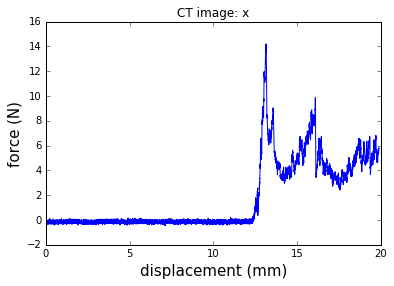

compression data:  2018-05-16_13-45-51_24h_no12_CTno1_H8.txt


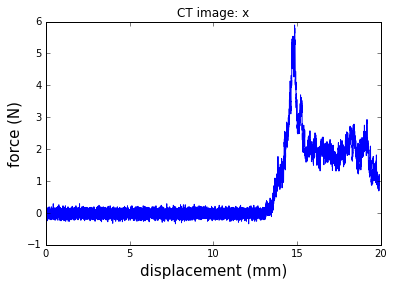

compression data:  2018-04-19_15-52-45_24h_no8.txt


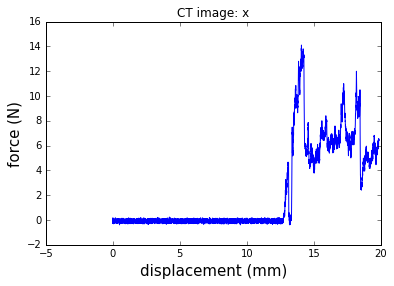

compression data:  2018-04-19_15-52-45_24h_no9.txt


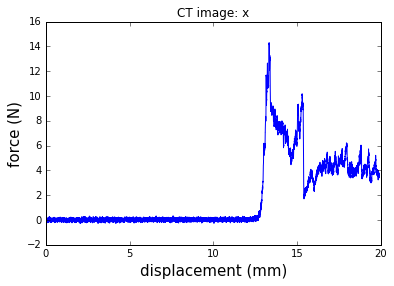

compression data:  2018-05-26_18-21-51_24h_CTno4_H1.txt


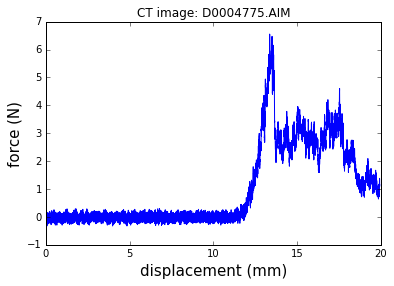

compression data:  2018-05-23_12-46-57_24h_CTno3_h1.txt


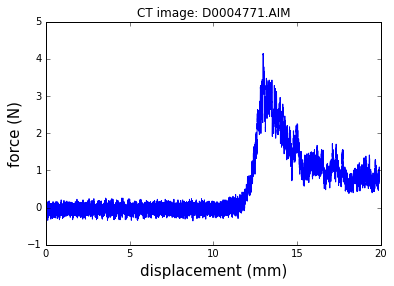

compression data:  2018-04-18_10-48-50_24h_no1.txt


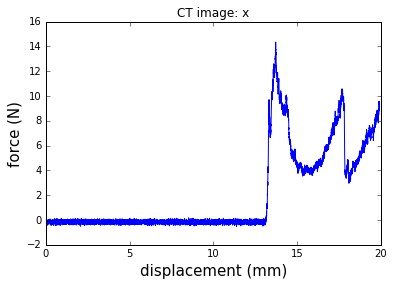

compression data:  2018-04-18_10-48-50_24h_no2.txt


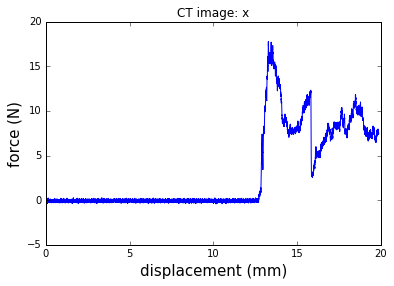

compression data:  2018-04-18_10-48-50_24h_no3.txt


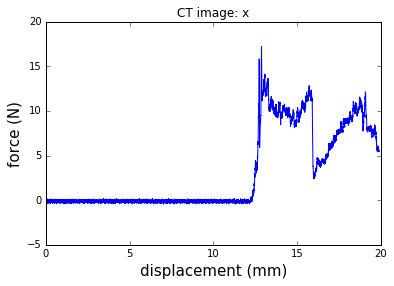

compression data:  2018-04-18_10-48-50_24h_no7.txt


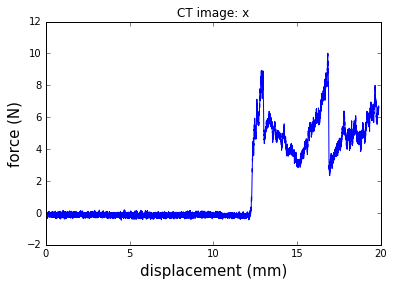

compression data:  2018-04-18_10-48-50_24h_no6.txt


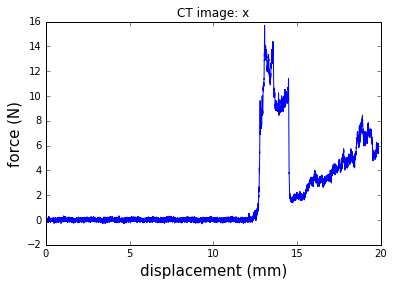

compression data:  2018-05-18_17-48-51_24h_no13_CTno2.txt


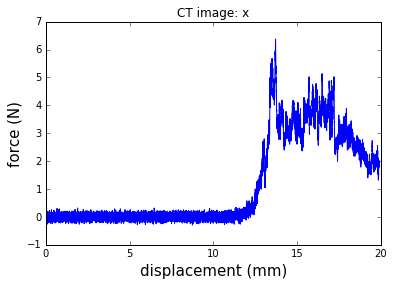

compression data:  2018-05-16_13-45-51_24h_no11_H6.txt


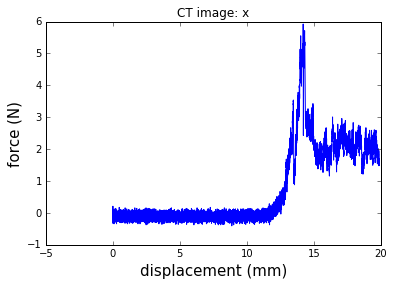

compression data:  2018-04-18_10-48-50_24h_no4.txt


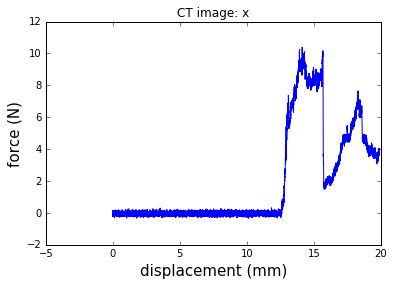

compression data:  2018-04-18_10-48-50_24h_no5.txt


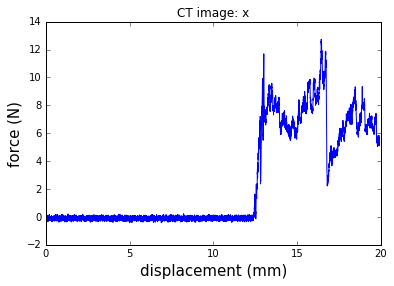

compression data:  2018-06-27_14-33-54_24h_CTno5.txt


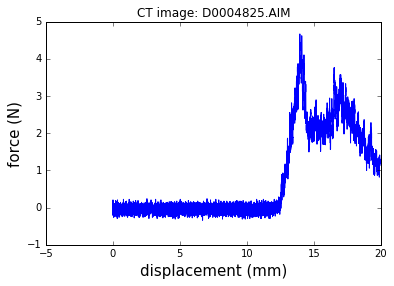

()

In [48]:
plot_experiment("RG_snow","1d")